# Previsão de Demanda com Regressão Linear — Wave Surfboards


#1. Introdução

No cenário competitivo atual, a capacidade de prever a demanda por produtos é um diferencial estratégico para empresas que buscam otimizar seus processos de produção, logística e vendas.

A Wave Surfboards, uma empresa fictícia especializada na fabricação e comercialização de pranchas de surfe, enfrenta o desafio de alinhar sua produção às oscilações de mercado, que são influenciadas por variáveis como condições climáticas e investimentos em marketing.


Este estudo propõe a aplicação de técnicas de Regressão Linear, utilizando bibliotecas como NumPy, Pandas, SciPy e Scikit-learn, para construir um modelo preditivo capaz de estimar as vendas mensais da Wave Surfboards com base em dados históricos de temperatura média e investimento em marketing. A abordagem visa demonstrar como a Matemática Aplicada e a Ciência de Dados podem oferecer soluções práticas e eficientes para desafios reais enfrentados pela Wave.



#2. Preparação do ambiente

##2.1.  Importação das bibliotecas

In [52]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# 3. Carregamento e Exploração dos Dados

##3.1. Apresentação dos dados

In [3]:
#Dados
vendas_mensais = [120, 135, 150, 160, 145, 155, 170, 180, 175, 165, 155, 160]
temperaturas_medias = [25.0, 26.5, 28.0, 29.5, 27.0, 26.0, 25.5, 24.0, 23.5, 22.0, 21.5, 22.5]
investimento_marketing = [5000, 5500, 6000, 6500, 6200, 5800, 6300, 6700, 6400, 6100, 5900, 6000]

# Criação do DataFrame
df = pd.DataFrame({
    "temperatura media": temperaturas_medias,
    "investimento marketing": investimento_marketing,
    "vendas mensais": vendas_mensais
})

df


,temperatura media,investimento marketing,vendas mensais
0,25.0,5000,120
1,26.5,5500,135
2,28.0,6000,150
3,29.5,6500,160
4,27.0,6200,145
5,26.0,5800,155
6,25.5,6300,170
7,24.0,6700,180
8,23.5,6400,175
9,22.0,6100,165


## 3.2. Análises descritivas

### a. Analise descritiva (describe)

A análise descritiva é utilizada para compreender a distribuição básica
e as principais características dos dados, auxiliando na identificação
de padrões gerais, tendências e
possíveis anomalias que possam impactar as etapas subsequentes da análise.



In [22]:
display(df[['temperatura media','investimento marketing','vendas mensais']].describe())

,temperatura media,investimento marketing,vendas mensais
count,12.000000,12.000000,12.000000
mean,25.083333,6033.333333,155.833333
std,2.475639,459.907764,16.899883
min,21.500000,5000.000000,120.000000
25%,23.250000,5875.000000,148.750000
50%,25.250000,6050.000000,157.500000
75%,26.625000,6325.000000,166.250000
max,29.500000,6700.000000,180.000000


**Explicação de cada item:**

count: Número de registro (neste caso, 12 registros em cada coluna).

mean: Média aritmética dos valores.

std: Desvio padrão – indica a dispersão dos dados em relação à média.

min: Valor mínimo.
25%: Primeiro quartil (Q1) – 25% dos dados são menores que esse valor.

50%: Mediana (Q2) – metade dos dados são menores que esse valor.

75%: Terceiro quartil (Q3) – 75% dos dados são menores que esse valor.

max: Valor máximo.

### b. Verificação de valores nulos

Verifica e imprime a quantidade de valores ausentes (NaN) em cada coluna do DataFrame

In [5]:
#Verificando se tem valores ausentes
print(df.isnull().sum())

temperatura media         0
investimento marketing    0
vendas mensais            0
dtype: int64


###c. Verificação de correlacao

É realizado para identificar como as variáveis numéricas do conjunto de
dados se relacionam entre si. Isso permite avaliar se existe
uma relação linear entre as variáveis independentes
(temperatura média e investimento em marketing) e a variável dependente(vendas mensais).

Coeficiente de Correlação	Classificação
r=0	Nula
(0 <	r


In [18]:
#Verificando a correlação
corr = df.corr()
display(f"Correlação entre variáveis:", corr)

'Correlação entre variáveis:'

,temperatura media,investimento marketing,vendas mensais
temperatura media,1.000000,0.045246,-0.289718
investimento marketing,0.045246,1.000000,0.890877
vendas mensais,-0.289718,0.890877,1.000000


- Temperatura Média x Vendas Mensais:
Correlação de -0,29, o que indica uma correlação negativa
fraca. Isso sugere que, conforme a temperatura aumenta,
há uma leve tendência de queda nas vendas mensais,
embora essa relação não seja forte o suficiente para afirmar
uma dependência direta entre as variáveis.

- Investimento em Marketing x Vendas Mensais:
Correlação de 0,89, o que representa uma correlação positiva forte.
Esse valor indica que o aumento nos investimentos em marketing está
fortemente associado ao aumento nas vendas mensais. Isso reforça a
importância do marketing como principal fator explicativo da demanda na loja.

- Temperatura Média x Investimento em Marketing:
Correlação de 0,045, indicando praticamente nenhuma correlação
entre essas duas variáveis. Isso significa que a temperatura não
influencia diretamente o investimento realizado em marketing, ou seja,
são fatores independentes entre si.


**Resultado:**
De acordo com a correlação, o investimento em marketing é a variável mais relevante para a previsão de vendas


###d. Verificação de outliers

In [ ]:

def detectar_outliers_iqr(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Verificando outliers em cada variável
for coluna in df.columns:
    outliers = detectar_outliers_iqr(coluna)
    print(f"\n Outliers na coluna '{coluna}':")
    if not outliers.empty:
        print(outliers)
    else:
        print("Nenhum outlier encontrado.")


##3.3. Vizualização gráfica

###a. mapa de correlação (heatmap)



O heatmap (mapa de calor) abaixo representa graficamente a matriz de
correlação entre as variáveis. Quanto mais próximo do vermelho, maior a
correlação positiva; quanto mais próximo do azul escuro, maior a correlação negativa.
As células com valores próximos de zero tendem a tons neutros.

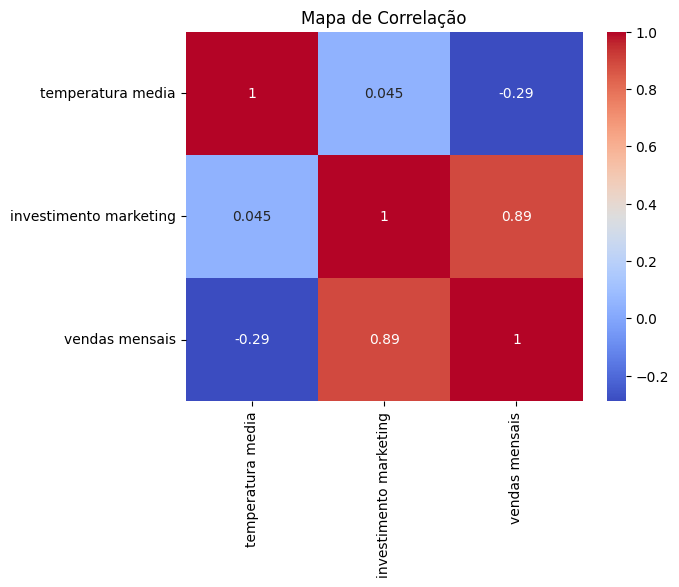

In [25]:

# Heatmap da correlação
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação")
plt.show()


###b. mapa de outliers

Utilizamos o boxplot para identificar os pontos fora do padrão nos dados porém de forma visual.

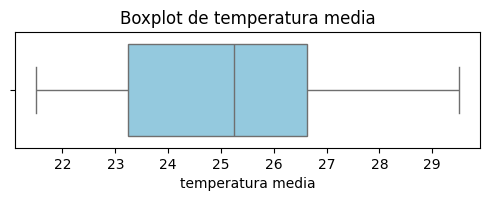

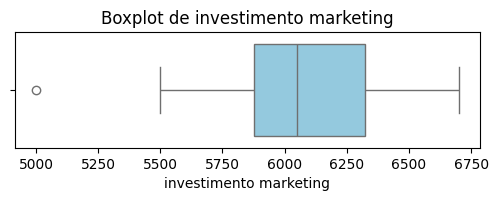

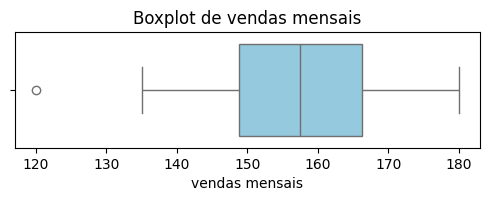

In [24]:
#Visualizando outliers com boxplots
for coluna in df.columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[coluna], color='skyblue')
    plt.title(f"Boxplot de {coluna}")
    plt.show()


**Conclusão do boxplot e outliers**

Na variável investimento em marketing e vendas mensais, observou-se um outlier à esquerda,
representando um investimento de R$5000 e uma venda abaixo do esperado.
Este ponto corresponde ao primeiro mês da série, esse valor não representa um erro,
desta forma não considerei um erro, mas sim uma ocorrência realista onde houve menor investimento,
o que resultou consequentemente em menor demanda.

###c. gráficos de dispersão

Os gráficos de dispersão mostram se as variáveis estão relacionadas (positivamente, negativamente ou não relacionadas). E com eles conseguimos detectar padrões como agrupamentos ou tendências e vizualizar pontos que fogem do padrão.
Nós gráficos de dispersão a seguir, temos a linha de tendencia, e a área sombreada.  A linha de tendencia indica a direção geral da relação entre as variáveis, sendo descentende ou ascendente.
Já a area sombreada,  ao redor da linha indica a margem de erro ou intervalo de confiança dessa estimativa.Quanto mais estreita for essa área, maior a confiança na estimativa da linha; quanto mais larga, maior a incerteza.


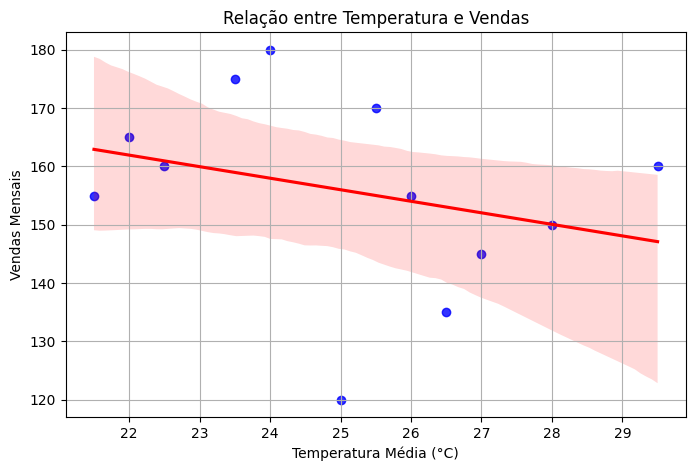

In [60]:
#Temperatura vs Vendas
plt.figure(figsize=(8, 5))
sns.regplot(x="temperatura media", y="vendas mensais", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Relação entre Temperatura e Vendas")
plt.xlabel("Temperatura Média (°C)")
plt.ylabel("Vendas Mensais")
plt.grid(True)
plt.show()

**Resultado do gráfico: **

A análise gráfica entre temperatura média e vendas mensais revelou vizualmente a tendência de correlação negativa. Como representado pela linha de regressão, à medida que a temperatura média aumenta, há uma leve tendência de queda nas vendas de prancha.

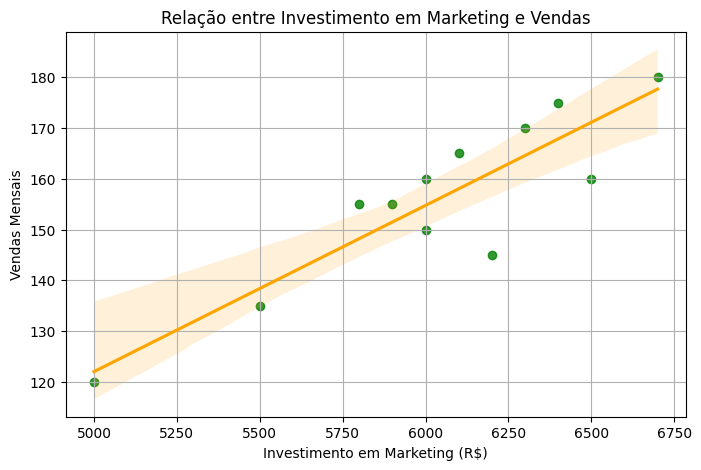

In [61]:
plt.figure(figsize=(8, 5))
sns.regplot(x="investimento marketing", y="vendas mensais", data=df, scatter_kws={"color": "green"}, line_kws={"color": "orange"})
plt.title("Relação entre Investimento em Marketing e Vendas")
plt.xlabel("Investimento em Marketing (R$)")
plt.ylabel("Vendas Mensais")
plt.grid(True)
plt.show()

**Resultado do gráfico: **

O gráfico de dispersão entre investimento em marketing e vendas mensais demonstra uma correlação positiva clara e consistente. A linha de regressão indica que, conforme os valores investidos em campanhas aumentam, o volume de vendas também cresce.


# 4. Pré-processamento dos Dados

Neste caso, os dados já estão limpos, sem valores ausentes. Portanto, seguimos diretamente para a modelagem. Vamos usar a regressão linear múltipla, tendo em vista que há duas variaveis.

## 4.1.  Modelagem com Regressão Linear Múltipla

In [44]:
#x são as variaveis independentes e y a variavel dependente
X = df[["temperatura media",'investimento marketing']]
y = df["vendas mensais"]

#Escolha do modelo de linear
modelo = LinearRegression()
modelo.fit(X, y)


print("""Interpretação dos Coeficientes do Modelo de Regressão Linear Múltipla""")
print('-------------------------------------------------')
print("Intercepto:", modelo.intercept_)

print("""
Representa o valor estimado das vendas mensais quando a temperatura média
e o investimento em marketing são zero. Embora esses valores possam não ter
significado prático pois temperatura zero e investimento zero são improváveis,
o intercepto é necessário para
ajustar a reta de regressão no espaço dos dados.""")
print('-------------------------------------------------')
print("Coeficiente(β1):", modelo.coef_[0])
print("""
Indica que, mantendo o investimento em marketing constante, um
aumento de 1 grau na temperatura média está associado a uma redução
média de aproximadamente 2,26 unidades nas vendas mensais. Esse coeficiente
negativo sugere uma relação inversa entre temperatura e vendas, possivelmente indicando que
vendas caem com o aumento da temperatura. """)
print('-------------------------------------------------')

print("Coeficiente(β2):", modelo.coef_[1])

print("""
Indica que, mantendo a temperatura média constante, um aumento de 1 unidade monetária no
investimento em marketing está associado a um aumento médio de 0,033
unidades nas vendas mensais. Ou seja, para cada incremento de 1000 unidades
monetárias no investimento, espera-se um aumento de cerca de 33 unidades vendidas,
evidenciando a influência positiva do marketing nas vendas das pranchas.
""")
print('-------------------------------------------------')


Interpretação dos Coeficientes do Modelo de Regressão Linear Múltipla
-------------------------------------------------
Intercepto: 11.632994750907613

Representa o valor estimado das vendas mensais quando a temperatura média 
e o investimento em marketing são zero. Embora esses valores possam não ter 
significado prático pois temperatura zero e investimento zero são improváveis, 
o intercepto é necessário para 
ajustar a reta de regressão no espaço dos dados.
-------------------------------------------------
Coeficiente(β1): -2.257535588420055

Indica que, mantendo o investimento em marketing constante, um 
aumento de 1 grau na temperatura média está associado a uma redução 
média de aproximadamente 2,26 unidades nas vendas mensais. Esse coeficiente 
negativo sugere uma relação inversa entre temperatura e vendas, possivelmente indicando que 
vendas caem com o aumento da temperatura. 
-------------------------------------------------
Coeficiente(β2): 0.033286219269385985

Indica que, m

####4.1.1.Avaliação do modelo


**Descrição das Métricas**

- Erro Médio Absoluto (MAE):
O MAE representa a média das diferenças absolutas entre os
valores observados e as previsões do modelo. Essa métrica
fornece uma medida clara do erro médio em unidades reais,
sendo útil para interpretar a precisão geral do modelo.

- Erro Quadrático Médio (MSE):
O MSE calcula a média dos quadrados dos erros entre os valores reais e previstos,
penalizando erros maiores de forma mais significativa.
Essa métrica é importante para detectar discrepâncias amplas
e avaliar a robustez do modelo.

- Coeficiente de Determinação (R²):
O R² indica a proporção da variabilidade dos dados que é
explicada pelo modelo. Valores próximos a 1 demonstram que
o modelo possui bom ajuste, sendo capaz de capturar grande
parte das variações presentes nos dados observados."""

In [56]:

y_pred = modelo.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.3f}")




Erro Médio Absoluto (MAE): 3.43
Erro Quadrático Médio (MSE): 25.45
Coeficiente de Determinação (R²): 0.903


**Resultado**

- Erro Médio Absoluto (MAE): 3.43

Em média, o modelo erra 3,43 unidades de venda para mais ou para menos.
É um erro relativamente baixo, indicando boa precisão nas previsões.

- Erro Quadrático Médio (MSE): 25.45

Penaliza mais os erros grandes. Um valor baixo como esse reforça que grandes desvios são raros.

- Coeficiente de Determinação (R²): 0.903

O modelo consegue explicar 90,3% da variação nas vendas mensais com base nas variáveis "temperatura média" e "investimento em marketing".

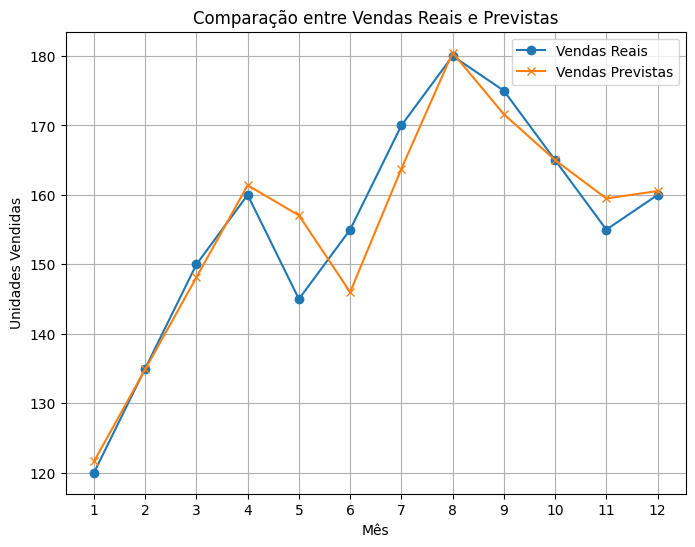

In [57]:

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(y)+1), y.values, label="Vendas Reais", marker='o')
plt.plot(range(1, len(y_pred)+1), y_pred, label="Vendas Previstas", marker='x')
plt.title("Comparação entre Vendas Reais e Previstas")
plt.xlabel("Mês")
plt.ylabel("Unidades Vendidas")
plt.xticks(range(1, len(y)+1))  # Exibe os meses de 1 a 12 no eixo X
plt.legend()
plt.grid(True)
plt.show()




Para complementar a análise modelo, criei uma visualização comparativa entre os valores reais e as previsões geradas pela regressão linear múltipla ao longo dos 12 meses.

O gráfico exibido apresenta as vendas mensais observadas e as vendas previstas pelo modelo, permitindo uma avaliação visual da qualidade do ajuste. É possível notar que as linhas se aproximam bastante, indicando que o modelo captura bem a tendência dos dados ao longo do tempo.


## 8. Conclusões e Melhorias

O modelo apresentou um bom desempenho para o conjunto de dados fornecido, com um coeficiente de determinação (R²) representativo da relação entre variáveis.

**Melhorias possíveis:**
- Incluir variáveis sazonais como mês ou estação do ano.
- Utilizar mais dados históricos para melhorar a robustez do modelo.
- Explorar modelos mais complexos como regressão polinomial, Ridge ou Lasso.